In [1]:
import numpy as numpy
import awkward as ak 
import uproot
import ROOT

In [2]:
Fname = "TT4B_2024_v15.root"

with uproot.open(Fname, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    Events = Tree.arrays(library="ak", how="zip")

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [3]:
Events.fields

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'orbitNumber',
 'HTXS_njets25',
 'HTXS_njets30',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_Mjj',
 'HTXS_V_pt',
 'HTXS_dPhijj',
 'HTXS_ptHjj',
 'BeamSpot_type',
 'BeamSpot_sigmaZ',
 'BeamSpot_sigmaZError',
 'BeamSpot_z',
 'BeamSpot_zError',
 'nboostedTau',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'nCorrT1METJet',
 'DeepMETResolutionTune_phi',
 'DeepMETResolutionTune_pt',
 'DeepMETResponseTune_phi',
 'DeepMETResponseTune_pt',
 'nElectron',
 'nFatJet',
 'nFatJetPFCand',
 'nFsrPhoton',
 'nGenJetAK8',
 'nGenJet',
 'nGenPart',
 'nGenProton',
 'nSubGenJetAK8',
 'Generator_id1',
 'Gen

In [4]:
Events.Jet.fields

['chMultiplicity',
 'nConstituents',
 'nElectrons',
 'nMuons',
 'nSVs',
 'neMultiplicity',
 'electronIdx1',
 'electronIdx2',
 'muonIdx1',
 'muonIdx2',
 'svIdx1',
 'svIdx2',
 'hfadjacentEtaStripsSize',
 'hfcentralEtaStripSize',
 'PNetRegPtRawCorr',
 'PNetRegPtRawCorrNeutrino',
 'PNetRegPtRawRes',
 'UParTAK4RegPtRawCorr',
 'UParTAK4RegPtRawCorrNeutrino',
 'UParTAK4RegPtRawRes',
 'UParTAK4V1RegPtRawCorr',
 'UParTAK4V1RegPtRawCorrNeutrino',
 'UParTAK4V1RegPtRawRes',
 'area',
 'btagDeepFlavB',
 'btagDeepFlavCvB',
 'btagDeepFlavCvL',
 'btagDeepFlavQG',
 'btagPNetB',
 'btagPNetCvB',
 'btagPNetCvL',
 'btagPNetCvNotB',
 'btagPNetQvG',
 'btagPNetTauVJet',
 'btagUParTAK4B',
 'btagUParTAK4CvB',
 'btagUParTAK4CvL',
 'btagUParTAK4CvNotB',
 'btagUParTAK4Ele',
 'btagUParTAK4Mu',
 'btagUParTAK4QvG',
 'btagUParTAK4SvCB',
 'btagUParTAK4SvUDG',
 'btagUParTAK4TauVJet',
 'btagUParTAK4UDG',
 'btagUParTAK4probb',
 'btagUParTAK4probbb',
 'chEmEF',
 'chHEF',
 'eta',
 'hfEmEF',
 'hfHEF',
 'hfsigmaEtaEta',
 'hfsi

In [5]:
Events.Jet.btagUParTAK4probbb

<Array [[6.88e-06, 0.00173, ..., 0.006], ...] type='22100 * var * float32'>

In [6]:
Events.Jet.pt

<Array [[71.9, 67.4, 57.7, ..., 17.7, 15.5], ...] type='22100 * var * float32'>

In [7]:
Events.Jet.hadronFlavour

<Array [[5, 5, 4, 5, 5, 0, 0, 5], ..., [5, ..., 4]] type='22100 * var * uint8'>

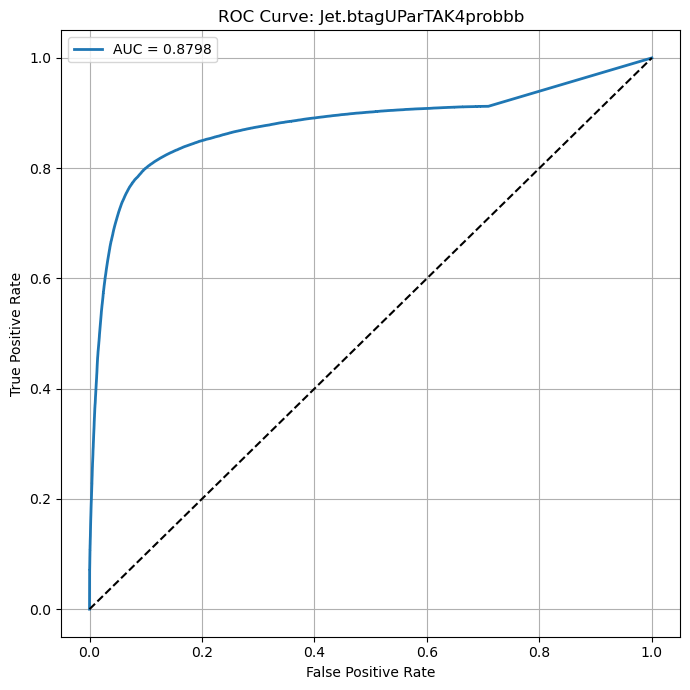

In [9]:
import uproot
import awkward as ak
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --------------------------
# Read the awkward arrays
# --------------------------
tagger = Events.Jet.btagUParTAK4probbb     # shape: (events, jets)
flavor = Events.Jet.hadronFlavour           # shape: (events, jets)

# --------------------------
# Flatten to 1D numpy arrays
# --------------------------
tagger_flat = ak.to_numpy(ak.flatten(tagger))
flavor_flat = ak.to_numpy(ak.flatten(flavor))

# --------------------------
# Truth: b-jets = 1, others = 0
# --------------------------
truth = (flavor_flat == 5).astype(int)

# --------------------------
# Compute ROC
# --------------------------
fpr, tpr, thresholds = roc_curve(truth, tagger_flat)
roc_auc = auc(fpr, tpr)

# --------------------------
# Plot ROC
# --------------------------
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Jet.btagUParTAK4probbb")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


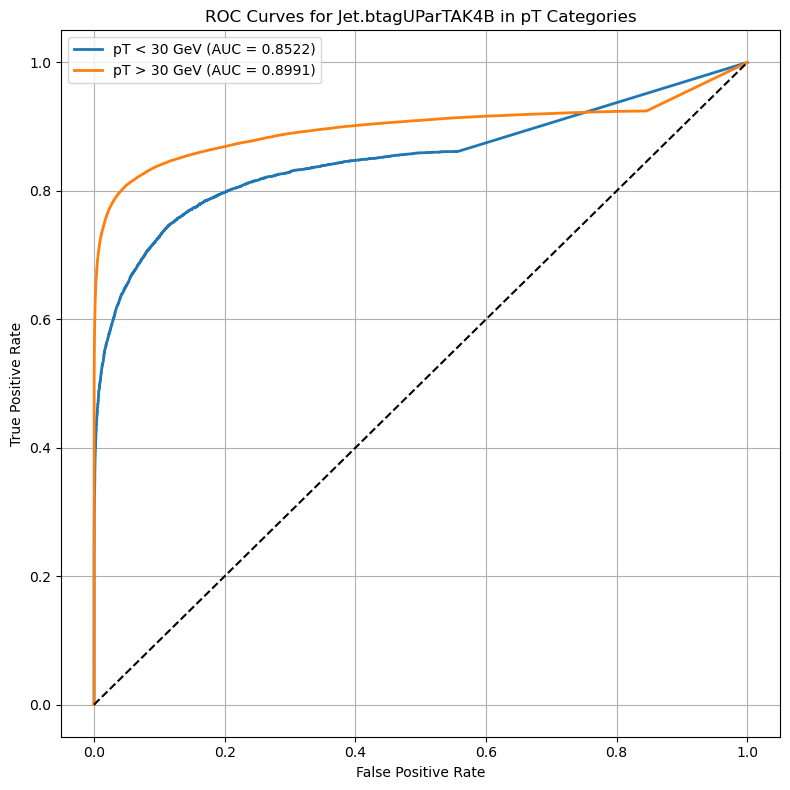

In [15]:
import awkward as ak
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# -------------------------------------------
# Extract awkward arrays
# -------------------------------------------
tagger = Events.Jet.btagUParTAK4B      # (events, jets)
flavor = Events.Jet.hadronFlavour           # (events, jets)
jet_pt = Events.Jet.pt                      # (events, jets)

# -------------------------------------------
# Category 1: Jet pT < 30 GeV
# -------------------------------------------
mask_low = (jet_pt < 30) & (jet_pt > 20)

tagger_low = ak.to_numpy(ak.flatten(tagger[mask_low]))
flavor_low = ak.to_numpy(ak.flatten(flavor[mask_low]))

truth_low = (flavor_low == 5).astype(int)

fpr_low, tpr_low, thr_low = roc_curve(truth_low, tagger_low)
auc_low = auc(fpr_low, tpr_low)

# -------------------------------------------
# Category 2: Jet pT > 60 GeV
# -------------------------------------------
# mask_high = (jet_pt > 30) & (jet_pt <= 60)
mask_high = (jet_pt > 30) 

tagger_high = ak.to_numpy(ak.flatten(tagger[mask_high]))
flavor_high = ak.to_numpy(ak.flatten(flavor[mask_high]))

truth_high = (flavor_high == 5).astype(int)

fpr_high, tpr_high, thr_high = roc_curve(truth_high, tagger_high)
auc_high = auc(fpr_high, tpr_high)

# -------------------------------------------
# Plot both ROC curves
# -------------------------------------------
plt.figure(figsize=(8, 8))

plt.plot(fpr_low, tpr_low, label=f"pT < 30 GeV (AUC = {auc_low:.4f})", linewidth=2)
plt.plot(fpr_high, tpr_high, label=f"pT > 30 GeV (AUC = {auc_high:.4f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Jet.btagUParTAK4B in pT Categories")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
